# **Rodrigo_Mesquita_DR4_AT**
## **Inteligência Artificial: Clusterização [24E2_4]**

### 1.Utilizando o dataset Wine Quality para realizar clusterização utilizando clusterização aglomerativa hierárquica. Você deve passar pelas seguintes etapas:

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, ward
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, mean_squared_error
from sklearn.cluster import KMeans
import numpy as np

In [6]:
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'

> #### 1A.Pré-processar os dados utilizando um scaler

In [7]:
df = pd.read_csv('/workspaces/Faculdade/Datasets/WineQT.csv')
X = df.drop('quality', axis=1)
Y = df['quality']

#Normalizando
scaler = StandardScaler()
X = scaler.fit_transform(X)

> #### 1B.Plotar o dendrograma e analisar o melhor número de clusters

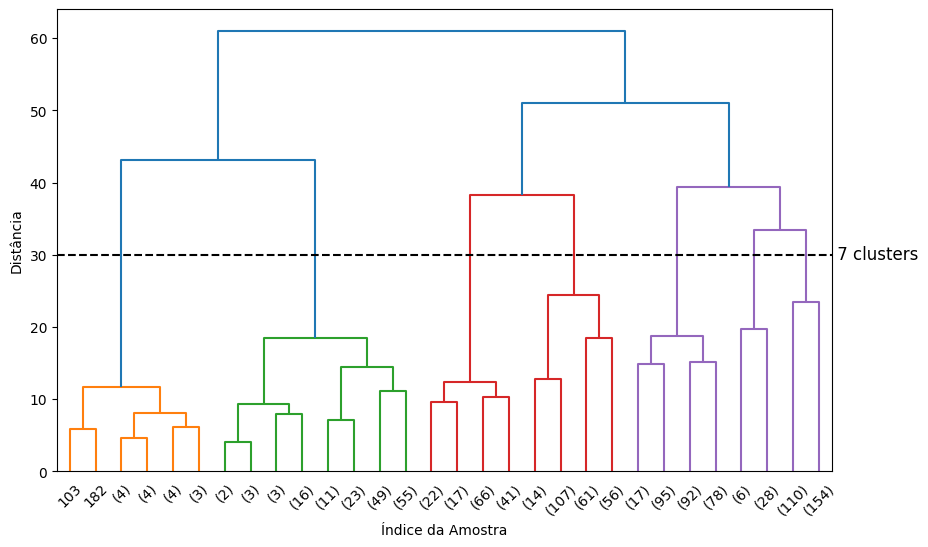

In [79]:
linkage_array = ward(X)

fig, ax = plt.subplots(figsize=(10, 6))
dendrogram(linkage_array, truncate_mode='level', p=4)


ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [30, 30], '--', c='k')
ax.text(bounds[1], 30, ' 7 clusters', va='center', fontdict={'size': 12})

plt.xlabel("Índice da Amostra")
plt.ylabel("Distância")
plt.show()

> #### 1C.Calcule o coeficiente de silhueta para avaliar a qualidade dos clusters formado

In [84]:
# Testando treinar o modelo com linkage average
model = AgglomerativeClustering(n_clusters=7, linkage='ward')
preds = model.fit_predict(X)
sil_ward = silhouette_score(X, preds)

model = AgglomerativeClustering(n_clusters=6, linkage='average')
preds = model.fit_predict(X)
sil_avg = silhouette_score(X, preds)
print(f'Coeficiente de Silhueta: Ward {sil_ward} | Average {sil_avg}')

Coeficiente de Silhueta: Ward 0.14239406179541866 | Average 0.4742174955114661


> #### 1D.Discuta os resultados e sugira possíveis melhorias para a análise.

Com o método padrão (Ward) alcançamos um coeficiênte de silhueta de 0.13, que entendo como muito baixo, sendo assim:
* O primeiro passo seria testar os demais métodos de aglomeração. Já realizei esse teste e ajustei o número de clusters para 6, alcançando 0.47 com o 'average", o que entendo como satisfatório.
* Caso a troca de método não tivesse sido suficiente, poderia tentar reduzir a dimensionalidade e tratar outliers.

#### 2.Utilizando o dataset Wine Quality, realize o método Elbow para encontrar o melhor valor de k para o algoritmo KMeans. Encontrado o melhor valor de k, calcule o coeficiente de silhueta. Compare o resultado com a clusterização aglomerativa hierárquica feita na Questão 1.

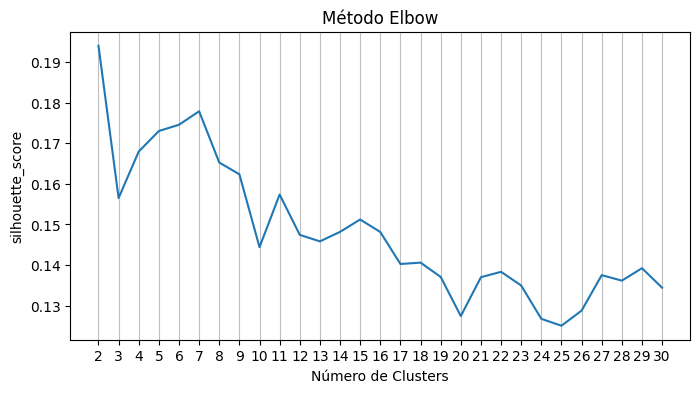

In [68]:
sil = []
range_k = range(2, 31)
for k in range_k:
    kmeans = KMeans(n_clusters=k, max_iter=100, random_state=22)
    kmeans.fit(X)
    preds = kmeans.predict(X)
    result = silhouette_score(X, preds)
    sil.append(result)

plt.figure(figsize=(8, 4))
#Ajustar o Xticks para que seja de 1 em 1
plt.xticks(range_k)
#Adicionar grid vertical
plt.grid(visible=True, axis='x', linestyle='-', color='gray', alpha=0.5)

# Plotar o gráfico do método Elbow
plt.plot(range_k, sil)
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('silhouette_score')
plt.show()

In [85]:
# Comparando resultados
print(f'Kmeans com 7 Clusters {sil[5]}')
print(f'Aglomerative(Ward) com 7 Clusters {sil_ward}')
print(f'Aglomerative(Avg) com 6 Clusters {sil_avg}') 

Kmeans com 7 Clusters 0.17790547130256346
Aglomerative(Ward) com 7 Clusters 0.14239406179541866
Aglomerative(Avg) com 6 Clusters 0.4742174955114661


#### 3.Explique passo a passo utilizando figuras de sua autoria como funciona o processo do DBSCAN. Explique a importância dos parâmetros epsilon e MinPts durante sua explicação.Explique o que é ruído, pontos core e de borda.

# ---------------PREENCHER ESSA QUESTÃO---------------

#### 4.Utilize o dataset sintético make_moons com 300 pontos e utilize DBSCAN para realizar a clusterização. Faça um plot de dispersão mostrando os clusters criados, separando os clusters por cor.

In [86]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

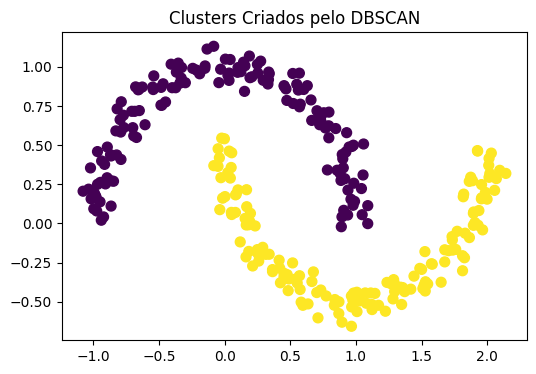

In [94]:
X, _ = make_moons(n_samples=300, noise=0.06, random_state=22)

# Aplicando DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X)

# Gráfico de dispersão
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Clusters Criados pelo DBSCAN')
plt.show()

Para realizar as questões 5, 6 e 7 do AT use o dataset Amazon Massive Intent. Utilize o método TF-IDF para converter dados textuais em representações numéricas
#### 5.Utilize o KMeans para agrupar textos do dataset da amazon. Realize o método elbow para encontrar o melhor valor para k. Faça uma análise do resultado.

#### 6.Utilize o algoritmo NMF e defina tópicos para o dataset da amazon. Faça uma análise do resultado.

#### 7.Utilize o algoritmo LDA e defina tópicos para o dataset da amazon. Faça uma análise do resultado.

#### 8.Utilize o algoritmo KMeans para reduzir as características do dataset Breast Cancer em 4 características e compare com o método PCA.